# Classification

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
churn = pd.read_csv('churn.csv')
churn.head()

,has_churned,time_since_first_purchase,time_since_last_purchase
0,0,-1.089221,-0.721322
1,0,1.182983,3.634435
2,0,-0.846156,-0.427582
3,0,0.086942,-0.535672
4,0,-1.166642,-0.672640


In [3]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   has_churned                400 non-null    int64  
 1   time_since_first_purchase  400 non-null    float64
 2   time_since_last_purchase   400 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 9.5 KB


In [4]:
churn.describe()

,has_churned,time_since_first_purchase,time_since_last_purchase
count,400.000000,400.000000,400.000000
mean,0.500000,-0.034370,0.144549
std,0.500626,0.952936,1.103133
min,0.000000,-1.273770,-0.870666
25%,0.000000,-0.828377,-0.645824
50%,0.500000,-0.152072,-0.265036
75%,1.000000,0.544826,0.571214
max,1.000000,3.738312,5.928242


EDA exploratory data analysis

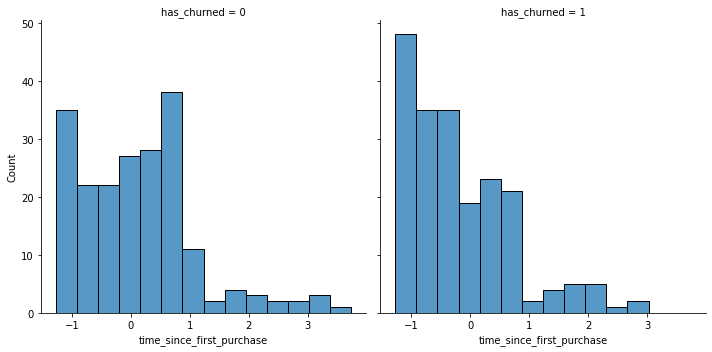

In [5]:
# plot distribution of variables
sns.displot(x='time_since_first_purchase', col='has_churned', data=churn)
plt.show()

Customers with shorter length of relationship tend to churn more frequently.

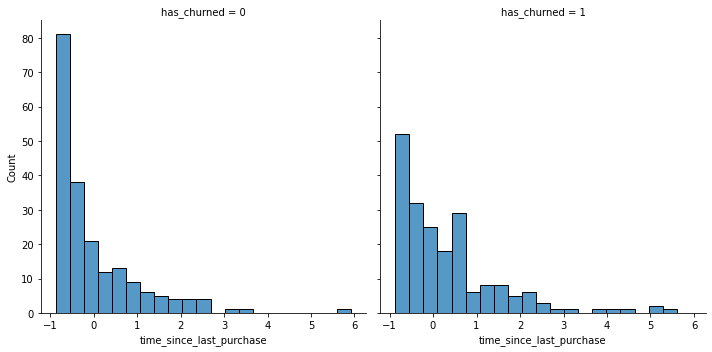

In [6]:
sns.displot(x='time_since_last_purchase', 
            col='has_churned', 
            data=churn)
plt.show()

Churnee customers had less recent activiry.

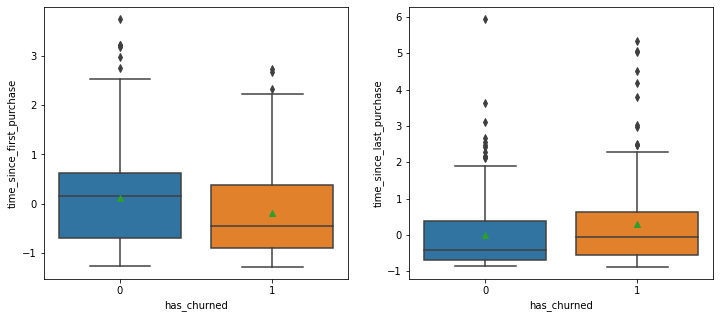

In [7]:
# visualize distribution of churning
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
sns.boxplot(x='has_churned', 
            y='time_since_first_purchase', 
            data=churn, 
            showmeans=True, ax=ax[0])
sns.boxplot(x='has_churned', 
            y='time_since_last_purchase', 
            data=churn, showmeans=True, 
            ax=ax[1])
plt.show()

The boxplot indicate that customers with shorter length of relationship and less recent activity tend to churn more frequently.

# k-Nearest Neighbors

In [8]:
# import module
from sklearn.neighbors import KNeighborsClassifier

# create features and target variable
X = churn.drop('has_churned', axis=1)
y = churn['has_churned']

# instantiate classifier with 6 neighbors
knn=KNeighborsClassifier(n_neighbors=6)

# fit classifier to the data
knn.fit(X, y)

KNeighborsClassifier(n_neighbors=6)

In [9]:
# create a set of unseen data
from itertools import product

time_since_first_purchase = np.arange(
    churn['time_since_first_purchase'].min(), 
    churn['time_since_first_purchase'].max(), .5)
time_since_last_purchase = np.arange(
    churn['time_since_last_purchase'].min(), 
    churn['time_since_last_purchase'].max(), .5)

# create p as all combinations of values of 
# 'time_since_first_purchase', and 'time_since_last_purchase'
p = product(time_since_first_purchase, 
            time_since_last_purchase)

# transform p into DF and name the columns
features = pd.DataFrame(
    p, 
    columns=['time_since_first_purchase', 
                'time_since_last_purchase'])

# predict data for training data X
y_predict = knn.predict(X)

# predict data for new features
y_new_predict = knn.predict(features)

# add a column of predictions
prediction_data = features.assign(has_churned = y_new_predict)
prediction_data.head()

,time_since_first_purchase,time_since_last_purchase,has_churned
0,-1.27377,-0.870666,1
1,-1.27377,-0.370666,1
2,-1.27377,0.129334,1
3,-1.27377,0.629334,1
4,-1.27377,1.129334,1


In [10]:
# import train_test_split
from sklearn.model_selection import train_test_split

# create features and target data
X = churn.drop('has_churned', axis = 1)
y = churn['has_churned']

# randomly split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = .25, 
    random_state = 42, stratify = y)

# instantiate k-NN classifier with 8 neighbors
knn_8 = KNeighborsClassifier(n_neighbors = 8)

# fit classifier to the training data
knn_8.fit(X_train, y_train)

# make prediction on the test data
y_pred = knn_8.predict(X_test)

# compute accuracy of the model
knn_8.score(X_test, y_test)

0.49

Overfitting and underfitting

Compute and plot training and testing accuracy scores for a variety of different neighbor values. By observing how the accuracy scores differ for the training and testing sets with different values of k, we develop an intuition for overfitting and underfitting. 

In [11]:
# setup array to store train and test accuracies
neighbors = np.arange(1, 15)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# loop over different values of k
for i, k in enumerate(neighbors):
    # setup kNN Classifier with 'k' neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    # fit classifier to the training data
    knn.fit(X_train, y_train)
    # compute accuracy of the training set
    train_accuracy[i] = knn.score(X_train, y_train)
    # compute accuracy of the testing data
    test_accuracy[i] = knn.score(X_test, y_test)
print(train_accuracy)
print(test_accuracy)

[0.99333333 0.80333333 0.79       0.73       0.73666667 0.71
 0.74       0.72       0.71666667 0.72       0.72333333 0.71
 0.71333333 0.71      ]
[0.46 0.51 0.46 0.47 0.47 0.49 0.47 0.49 0.49 0.46 0.47 0.46 0.48 0.46]


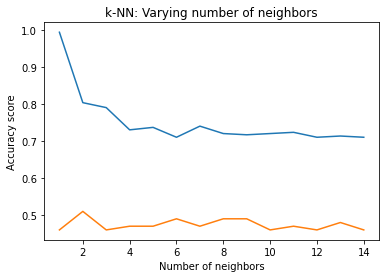

In [12]:
# generate the plots
plt.figure()
plt.plot(neighbors, train_accuracy, label = 'Train accuracy')
plt.plot(neighbors, test_accuracy, label = 'Test accuracy')
plt.title('k-NN: Varying number of neighbors')
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy score')
plt.show()

The test accuracy is highest when using 9 neighbors. Using 10 neighbors or more result in a simple model that underfits the data. 

# Fine-tuning the model

Metrics for classification.

Accuracy is not always the informative metric for a classification model. Now we compute the confusion matrix and generate classification report. The classification report consists of three rows, and an additional support column. The support gives the number of samples of the true response that lie in that class. Precision, recall, and f1-score columns give the respective metrics for that particular class. 

In [4]:
diabetes = pd.read_csv('diabetes.csv')
diabetes.head(2)

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0


The goal is to predict whether or not a given femail patient will contract diabetes based on features such as BIM, age, and number of pregnancies. Therefore, it is a binary classification problem. A target value of 0 indicates that the patient does not have diabetes, while a value of 1 indicates that the patient does have  diabetes. We train a k_NN Classifier to the data and evaluate its performance by generating a confusion matrix and classification report. 

In [5]:
# import modules 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from statsmodels.graphics.mosaicplot import mosaic

# create features and target variables
X = diabetes.drop('diabetes', axis=1)
y = diabetes['diabetes']

# split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=.25, 
    random_state = 42)

# instantiate k-NN classifier with 6 neighbors
knn = KNeighborsClassifier(n_neighbors=6)

# fit the model to the training data
knn.fit(X_train, y_train)

# make prediction on testing data
y_pred = knn.predict(X_test)

# generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix

array([[99, 24],
       [35, 34]])

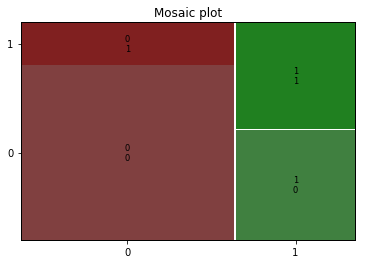

In [15]:
# plot confusion matrix
mosaic(conf_matrix, title = 'Mosaic plot')
plt.show()

In [6]:
# extract TN, TP, FN, FP from confusion matrix
TP = conf_matrix[1, 1]
TN = conf_matrix[0, 0]
FN = conf_matrix[1, 0]
FP = conf_matrix[0, 1]

In [7]:
# create classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.80      0.77       123
           1       0.59      0.49      0.54        69

    accuracy                           0.69       192
   macro avg       0.66      0.65      0.65       192
weighted avg       0.68      0.69      0.69       192



# Precision

Precision = TP/(TP + FP)

Precision indicates what proportion of positive identifications was actually correct. A model that produces no False positives has a Precision =  1.0

The less Precision is the more FP the model predict. If we want to reduce FP, we need to increase Precision score. If Precision = 1.0 (max), we don`t have any FP at all.

Working with Precision, we manage FP. Precision increase - FP decrese, Precision decrease - FP increase. When it comes to Fraud, FP means the model labels good customers as fraud.

In [8]:
# calculate Precision in the example above
# the result indicates that the 59% of positives 
# predicted by the model is an actual positives
# The rest 41% of positives predicted are negatives in fact
Precision = TP/(TP + FP)
print(Precision)

0.5862068965517241


# Recall

Recall = TP/(TP + FN)

Recall indicates what proportion of actual positives was identified correctly. A model that produces no False Negatives has a Recall = 1.0

The less Recall is the more FN the model predict. If we want to reduce FN, we need to improve Recall. If Recall = 1.0 (max), we don`t have any FN at all.

Working with Recall, we manage FN (False Negative) metric. Recall increase - FN decrease, Recall decrease - FN increase. When it comes to fraud, False Negative means the model misses fraudulent events.

In [9]:
# calculate Recall in the example above
# Recall = 0.49 indicates that the model 
# predicted 49% of actual positives correctly.
# The rest 51% of actual positives the model labeled 
# as negatives, which means the model 
# missed 51% of fraudulent events.
Recall = TP/(TP + FN)
print(Recall)

0.4927536231884058


# Precision vs Recall

To fully evaluate the effectiveness of a model, we must examine both Precision and Recall. Unfortunatelly, Precision and Recall are often in tension. That is, improving Precision typically reduces Recall and vica versa.

# Logistic regression and ROC curve

Scikit-learn makes it very easy to try differnt models, since the train_test_split/instantiate/fit/predict paradigm applies to all classifiers and regressions - which are known in scikit-learn as 'estimators'. Check if logistic regression outperforms k-NN.

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from statsmodels.graphics.mosaicplot import mosaic

In [19]:
# instantiate Logistic regression object
logreg = LogisticRegression(max_iter=1000, tol=0.1)

# fit classifier to the training data
logreg.fit(X_train, y_train)

# predict labels of the test set
y_pred = logreg.predict(X_test)

# compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix

array([[95, 28],
       [25, 44]], dtype=int64)

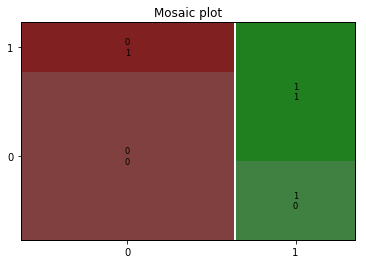

In [20]:
# plot the matrix
mosaic(conf_matrix, title='Mosaic plot')
plt.show()

In [21]:
# compute classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.77      0.78       123
           1       0.61      0.64      0.62        69

    accuracy                           0.72       192
   macro avg       0.70      0.71      0.70       192
weighted avg       0.73      0.72      0.73       192



# Plotting ROC curve

Classification report and confusion matrix are great methods to quantitatively evaluate model performance, while ROC curve provides a way to visually evaluate the model. Most classifiers in scikit-learn have .predict_proba() method which returns the probability of a given sample being in particular class. 

ROC curve (receiver operating characteristic curve) is a graph showing the performance of a classification model at all classification thresholds. This curve plots two parameters:
- True Positive Rate;
- False Positive Rate.

True Positive Rate (TPR) is a synonym for Recall: 
- TPR = TP / (TP + FN) 

False Positive Rate (FPR):
- FPR = FP / (FP + TN)

- TPR indicates the fraction of TP predicted by the model out of all actual positives.
- FPR indicates the fraction of FP predicted by the model out of all actual negatives.
- Lowering the classification threshold classifies more items as positive, thus increasing both False Positives and True Positives.

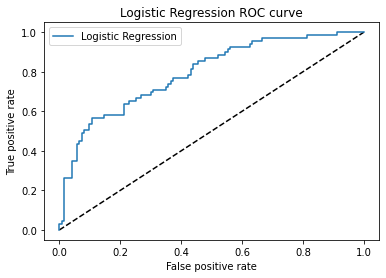

In [22]:
from sklearn.metrics import roc_curve

# compute predicted probabilities of the labels of X_test
y_pred_prob = logreg.predict_proba(X_test)[:, 1]

# create ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# plot ROC curve with fpr on the x-axis and tpr on the y-axis
fig = plt.figure()
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label = 'Logistic Regression')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Logistic Regression ROC curve')
plt.legend()
plt.show()

# Precision-recall curve 

Precision-recall curve is another way to visually evaluate a model performance. Precision-recall curve generated by plotting the precision and recall for different thresholds. This implementation is restricted to the binary classification task. 

Precision = TP / (TP + FP)

Recall = TP / (TP + FN)

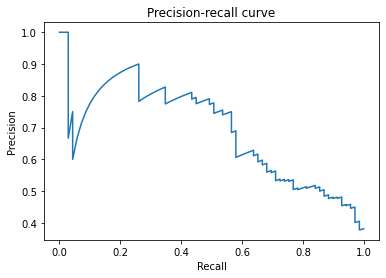

In [23]:
from sklearn.metrics import precision_recall_curve

# generate Precision-recall curve values
precision, recall, thresholds = precision_recall_curve(
    y_test, y_pred_prob)

# plot Precision-recall curve with Recall on x-axis and 
# Precision on y-axis
fig = plt.figure()
plt.plot(recall, precision)
plt.title('Precision-recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

The Precision-recall curve shows the tradeoff between precision and recall for different thresholds. A high area under the curve represents both high recall and high precision, where high precision relates to a low false positive rate, and high recall relates to a low false negative rate. High scores for both show that the classifier is returning accurate results  (high precision), as well as returning a majority of all positive results (high recall).

A system with high recall but low precision returns many results, but most of its predicted labels are incorrect when compared to the training labels. A system with high precision but low recall is just the opposite, returning very few results, but most of its predicted labels are correct when compared to the training labels. An ideal system with high precision and high recall will return many results, with all results labeled correctly. 

# AUC Area under the ROC curve

To compute the points in an ROC curve, we could evaluate a logistic regression model many times with different classification thresholds, but this would be inefficient. AUC - sorting-based algorithm can provide this information for us.

AUC (Area under the ROC curve) measures the entire two-dimentional area underneath the entire ROC curve. AUC provides an aggregate measure of the model performance across all possible classification thresholds.

Larger area under the ROC curve = better model. '1' is maximum.

Compute AUC using roc_auc_score() function

In [24]:
#  import modules
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score

In [25]:
# compute  predicted probabilities of the labels of 
# the test set X_test
y_pred_prob = logreg.predict_proba(X_test)[:, 1]

# compute AUC score
roc_auc_score(y_test, y_pred_prob)

0.7922705314009661

Compute AUC scores by performing 5-fold cross-validation

In [26]:
cv_scores = cross_val_score(
    logreg, X, y, cv=5, scoring='roc_auc')
cv_scores

array([0.81240741, 0.80777778, 0.82555556, 0.87283019, 0.84471698])

In [27]:
np.mean(cv_scores)

0.8326575821104122

Compute average precision AP using avearge_precision_score() function. AP is alternative to AUC to evaluate the model performance. 

In [28]:
from sklearn.metrics import average_precision_score

# compute AP
average_precision_score(y_test, y_pred_prob)

0.689905066189553

In [29]:
# compute AP scores by performing 5-fold cross-validation
cv_scores_1 = cross_val_score(
    logreg, X, y, cv=5, scoring='average_precision')
cv_scores_1

array([0.73274528, 0.70235979, 0.74564386, 0.78030386, 0.68637596])

In [30]:
# compute average of AP
np.mean(cv_scores_1)

0.7294857502390247

# Hyperparameter tuning with GridSearchCV

Logistic regression also has a regularization parameter 'C'. C controls the inverse of regularization strength, and this is what we tune now. A large C can lead to an overfit model, while a small C can lead to an underfit model. Now we use GridSearchCV and logistic regression to find the optimal C in this hyperparameter space.  

In [31]:
# import modules
from sklearn.model_selection import GridSearchCV

# create features and target variable
X = diabetes.drop('diabetes', axis = 1)
y = diabetes['diabetes']

# setup the hyperparameter grid by using c_space as a grid of values to tune C over
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space}

# instantiate LogisticRegression classifier
logreg = LogisticRegression(max_iter=1000)

# instantiate the GridSearchCV object
logreg_cv = GridSearchCV(logreg, param_grid, cv=5)

# fit it to the data
logreg_cv.fit(X, y)

# print the best parameters and best scores
print(logreg_cv.best_params_)
print(logreg_cv.best_score_)

{'C': 0.006105402296585327}
0.7734742381801205


# Hyperparameter tuning with RandomizedSearchCV

GridSearchCV can be computationally expensive, especially if we are searching over a large hyperparameter space and dealing with multiple hyperparameters. A solution to this is to use RandomizedSearchCV, in which not all hyperparameter values are tried out. Instead, a fixed number of hyperparameter settings is sampled from specified probability distribution. 

Our goal is to use RandomizedSearchCV to find the optimal hyperparameters. 

In [32]:
# import modules
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

# setup parameters and distributions to sample from
param_dist = {'max_depth':[3, None],
             'max_features':randint(1, 9),
             'min_samples_leaf':randint(1, 9), 
             'criterion': ['gini', 'entropy']}

# instantiate decision tree classifier
tree = DecisionTreeClassifier()

# instantiate RandomizedSearchCV object
tree_cv = RandomizedSearchCV(tree, param_dist, cv=5)

# fit the model to the data
tree_cv.fit(X, y)

# print tuned parameters and score
print(tree_cv.best_params_)
print(tree_cv.best_score_)

{'criterion': 'gini', 'max_depth': 3, 'max_features': 7, 'min_samples_leaf': 1}
0.7448433919022154


RandomizedSearchCV will never outperform GridSearchCV. Instead, it is valuable because it saves on computation time. 

Hold-out set for final evaluation: Classification

In addition to 'C', logistic regression has a 'penalty' hyperparameter which specifies whether to use 'l1' or 'l2' regularization. Now we create a hold-out set, tune 'C' and 'penalty' hyperparameters of a logistic regression classifier using GridSearchCV on the training set.

In [33]:
# import modules
from sklearn.model_selection  import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# create features and target variable
X = diabetes.drop('diabetes', axis = 1)
y = diabetes['diabetes']

# create hyperparameter grid
c_space = np.logspace(0, 12, 15)
param_grid = {'C':c_space, 'penalty':['l1', 'l2']}

# instantiate LogisticRegression classifier
logreg = LogisticRegression(max_iter = 1000)

# cplit data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state = 0)

# instantiate GridSearchCV object
logreg_cv = GridSearchCV(logreg, param_grid, cv=10)

# fit the model to the training data
logreg_cv.fit(X_train, y_train)

# print the best parameters and best scores
print(logreg_cv.best_params_)
print(logreg_cv.best_score_)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_v

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_v

{'C': 1.0, 'penalty': 'l2'}
0.7523759608665269


# Preprocessing data

In [34]:
df = pd.read_csv('gm_2008_region.csv')
df.head(2)

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality,Region
0,34811059.0,2.73,0.1,3.328945,24.59620,12314.0,129.9049,75.3,29.5,Middle East & North Africa
1,19842251.0,6.43,2.0,1.474353,22.25083,7103.0,130.1247,58.3,192.0,Sub-Saharan Africa


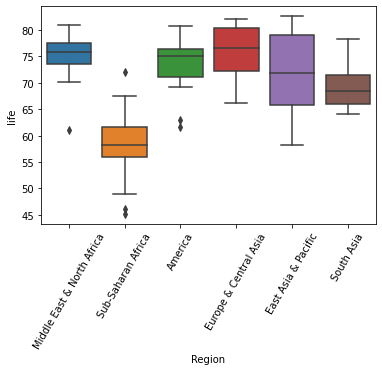

In [35]:
sns.boxplot(x='Region', y='life', data=df)
plt.xticks(rotation=60)
plt.show()

'Region' feature contains very useful information that can predict life expectancy. For example, Sub-Sahara Africa  has a lower life expectancy compared to Europe and Central Asia. Therefore, if we are trying to predict life expectancy, it would be preferable to retain 'Region' feature. To do this, we need to binarize it by creating dummy variables. 

In [36]:
# create dummy variables
df_region = pd.get_dummies(df)

# print columns of df_region
df_region.columns

Index(['population', 'fertility', 'HIV', 'CO2', 'BMI_male', 'GDP',
       'BMI_female', 'life', 'child_mortality', 'Region_America',
       'Region_East Asia & Pacific', 'Region_Europe & Central Asia',
       'Region_Middle East & North Africa', 'Region_South Asia',
       'Region_Sub-Saharan Africa'],
      dtype='object')

In [37]:
# create dummy variables with drop_first=True
df_region = pd.get_dummies(df, drop_first=True)
df_region.columns

Index(['population', 'fertility', 'HIV', 'CO2', 'BMI_male', 'GDP',
       'BMI_female', 'life', 'child_mortality', 'Region_East Asia & Pacific',
       'Region_Europe & Central Asia', 'Region_Middle East & North Africa',
       'Region_South Asia', 'Region_Sub-Saharan Africa'],
      dtype='object')

Specifying drop_first=True we drop the unneeded dummy variable (in this case, 'Region_America'). Now, that we created the dummy variables, we can use 'Region' feature to predict life expectancy. 

# Dropping missing data

In [38]:
votes = pd.read_csv('house-votes-84.csv')
votes.head(2)

,republican,n,y,n.1,y.1,y.2,y.3,n.2,n.3,n.4,y.4,?,y.5,y.6,y.7,n.5,y.8
0,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
1,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n


We see that there are certain dataa points labeled with '?'. These denote missing values. Different datasets encode missing values in different ways. Sometimes, it may be '9999', other times '0'. Real world data can be very messy! If you are lucky, missing values will already be encoded as NaN. We uuse NaN because it is an efficient and simplified way of internally representing missing data, and it lets us take advantage of panndas methods such as .dropna() and fillna(), as well as scikit-learn`s Imputation transformer Imputer().

We have to convert '?' to NaN, and then drop the rows that contain them from DF.

In [39]:
# convert '?' to NaN
votes[votes == '?'] = np.nan

# count the total number of NaNs
votes.isna().sum()

republican      0
n              12
y              48
n.1            11
y.1            11
y.2            15
y.3            11
n.2            14
n.3            15
n.4            22
y.4             7
?              20
y.5            31
y.6            25
y.7            17
n.5            28
y.8           104
dtype: int64

In [40]:
# drop missing data
votes_droped = votes.dropna()
votes_droped.isna().sum()

republican    0
n             0
y             0
n.1           0
y.1           0
y.2           0
y.3           0
n.2           0
n.3           0
n.4           0
y.4           0
?             0
y.5           0
y.6           0
y.7           0
n.5           0
y.8           0
dtype: int64

In [41]:
# print shapes of DFs
print(votes.shape)
print(votes_droped.shape)

(434, 17)
(232, 17)


If we drop missing data, we may end up throwing away valuable information along with missing data. It is better instead to develop an imputation strategy. We can impute missing values with mean or median of the row or column that missing data is in.

In [42]:
votes.head(2)

,republican,n,y,n.1,y.1,y.2,y.3,n.2,n.3,n.4,y.4,?,y.5,y.6,y.7,n.5,y.8
0,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,NaN
1,democrat,NaN,y,y,NaN,y,y,n,n,n,n,y,n,y,y,n,n


In [43]:
# replace 'n' with 0 and 'y' with 1
votes[votes == 'n'] = 0
votes[votes == 'y'] = 1
votes.head(2)

,republican,n,y,n.1,y.1,y.2,y.3,n.2,n.3,n.4,y.4,?,y.5,y.6,y.7,n.5,y.8
0,republican,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,NaN
1,democrat,NaN,1,1,NaN,1,1,0,0,0,0,1,0,1,1,0,0


# Imputing missing data in ML Pipeline

Having set up the pipeline steps, we can use it for classification. Now, we use it on the votes dataset to classify a Congressman`s party affiliation. What makes pipeline so incredibly usefull is the simple interface that they provide. We can use .fit() and .predict() methods on pipelines just as we did with classifiers and regressors.

SVC stands for Support Vector Classification, which is a type of SVM(Support Vector Machine).

In [44]:
# import modules
from sklearn.impute import SimpleImputer
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from statsmodels.graphics.mosaicplot import mosaic

# create features and target variable
X = votes.drop('republican', axis = 1)
y = votes['republican']

# setup the imputation transformer
imp = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')

# instantiate SVC classifier
clf = SVC()

# create the steps of pipeline with a list of tuples
# first tuple should consist of imputation step
# second tuple should consist of classifier
steps = [('imputation', imp), ('SVM', clf)]

# create pipeline
pipeline = Pipeline(steps)

# create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state = 1)

# fit the pipeline to the training set
pipeline.fit(X_train, y_train)

# predict labels on the test set
y_pred = pipeline.predict(X_test)

# create confusion matrix and classification report
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

    democrat       0.98      0.95      0.97        88
  republican       0.91      0.95      0.93        43

    accuracy                           0.95       131
   macro avg       0.94      0.95      0.95       131
weighted avg       0.96      0.95      0.95       131

[[84  4]
 [ 2 41]]


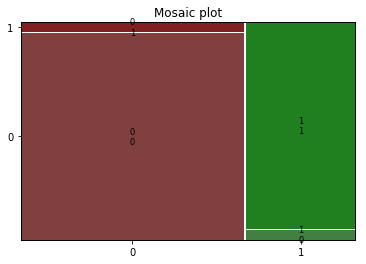

In [45]:
# create mosaic plot
mosaic(confusion_matrix(y_test, y_pred), title = 'Mosaic plot')
plt.show()

# Imputing missing data separately

In [46]:
# import modules
from sklearn.impute import SimpleImputer
from sklearn.svm import SVC

# create features and target data
X =  votes.drop('republican', axis = 1)
y = votes['republican']

# instantiate the imputer
imp = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')

#  fit imputer to the data and then transform it
X = imp.fit_transform(X)
X

array([[0, 1, 0, ..., 1, 0, 1],
       [0, 1, 1, ..., 1, 0, 0],
       [0, 1, 1, ..., 0, 0, 1],
       ...,
       [0, 1, 0, ..., 1, 0, 1],
       [0, 0, 0, ..., 1, 0, 1],
       [0, 1, 0, ..., 1, 0, 0]], dtype=object)

After transforming the data we can then fit our model to it.

# Centering and scaling

In [47]:
wine = pd.read_csv('white-wine.csv')
wine.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.001,3.0,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.994,3.3,0.49,9.5,6


In [48]:
wine['quality'].unique()

array([6, 5, 7, 8, 4, 3, 9], dtype=int64)

We have used 'quality' feature of the wine to create a binary target variable. If 'quality' is less than 5, the target variable is 1, and otherwise, it is 0.

In [49]:
# add column 'target'
range = [0, 4, np.inf]
group_names = [1, 0]
wine['target'] = pd.cut(wine['quality'], bins=range, labels=group_names)
wine.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,target
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.001,3.0,0.45,8.8,6,0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.994,3.3,0.49,9.5,6,0


# Scaling features

In [50]:
# import modules
from sklearn.preprocessing import scale

# create features  and target variable
X = wine.drop(['target', 'quality'], axis = 1).values
y = wine['target'].values

# scale the features
X_scaled = scale(X)

print('Mean scaled: ', np.mean(X_scaled))
print('Std scaled: ', np.std(X_scaled))
print('Mean unscaled: ', np.mean(X))
print('Std unscaled: ', np.std(X))

Mean scaled:  2.7314972981668206e-15
Std scaled:  0.9999999999999999
Mean unscaled:  18.432687072460002
Std unscaled:  41.54494764094571


# Centering and scaling in pipeline

In [51]:
# import modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# create features and target variable
X = wine.drop(['target', 'quality'], axis = 1).values
y = wine['target'].values

# setup the pipeline steps
steps = [('scaler', StandardScaler()), ('knn', KNeighborsClassifier())]

# create pipeline
pipeline = Pipeline(steps)

# create training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = .7, random_state = 11)

# fit pipeline to the training set
knn_scaled = pipeline.fit(X_train, y_train)

# instantiate and fit k-NN classifier to unscaled data
knn_unscaled = KNeighborsClassifier().fit(X_train, y_train)

# compute accuracy scores  for both scaled and unscaled data
print('Accuracy of scaled data: ', knn_scaled.score(X_test, y_test))
print('Accuracy of unscaled data: ', knn_unscaled.score(X_test, y_test))

Accuracy of scaled data:  0.9578231292517007
Accuracy of unscaled data:  0.9537414965986395


Scaling has improved the model performance.

# Pipeline for Classification

Now, we build a pipeline that includes scaling and hyperparameter tuning to classify wine quality.

In [52]:
# import modules
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler

# create features and target variable
X = wine.drop(['target', 'quality'], axis = 1)
y = wine['target']

# setup pipeline
steps = [('scaler', StandardScaler()), ('SVM', SVC())]
pipeline =  Pipeline(steps)

# specify the hyperparameter space using the following notation:
# 'step_name__parameter_name'
# here, step_name is SVM, and parameter_name are C and gamma
parameters = {'SVM__C':[1, 10, 100], 'SVM__gamma':[0.1, 0.01]}

# create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 21)

# imstantiate GridSearchCV object
cv = GridSearchCV(pipeline, parameters)

# fit it to the training set
cv.fit(X_train, y_train)

# predict labels on the test set
y_pred = cv.predict(X_test)

# compute and print metrics
print('Accuracy: ', cv.score(X_test, y_test))
print(classification_report(y_test, y_pred))
print('Tuned model parameters: ', cv.best_params_)

Accuracy:  0.9693877551020408
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       951
           1       0.43      0.10      0.17        29

    accuracy                           0.97       980
   macro avg       0.70      0.55      0.58       980
weighted avg       0.96      0.97      0.96       980

Tuned model parameters:  {'SVM__C': 100, 'SVM__gamma': 0.01}


In [53]:
# checking available parameters
cv.get_params().keys()

dict_keys(['cv', 'error_score', 'estimator__memory', 'estimator__steps', 'estimator__verbose', 'estimator__scaler', 'estimator__SVM', 'estimator__scaler__copy', 'estimator__scaler__with_mean', 'estimator__scaler__with_std', 'estimator__SVM__C', 'estimator__SVM__break_ties', 'estimator__SVM__cache_size', 'estimator__SVM__class_weight', 'estimator__SVM__coef0', 'estimator__SVM__decision_function_shape', 'estimator__SVM__degree', 'estimator__SVM__gamma', 'estimator__SVM__kernel', 'estimator__SVM__max_iter', 'estimator__SVM__probability', 'estimator__SVM__random_state', 'estimator__SVM__shrinking', 'estimator__SVM__tol', 'estimator__SVM__verbose', 'estimator', 'iid', 'n_jobs', 'param_grid', 'pre_dispatch', 'refit', 'return_train_score', 'scoring', 'verbose'])

# ML for marketing

# Preparation for the modeling

In [54]:
from sklearn.preprocessing import StandardScaler

In [55]:
telko_raw = pd.read_csv('telco.csv')
telko_raw.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No


In [56]:
telko_raw.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [57]:
telko_raw.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [58]:
# separate identifier and target variable
custid = ['customerID']
target = ['Churn']

In [59]:
# separate categorical and numerical column names as lists
categorical = telko_raw.nunique()[telko_raw.nunique() < 5].keys().tolist()

# remove target variable
categorical.remove(target[0])
categorical

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

In [60]:
# store remaining columns as numerical
numerical = [x for x in telko_raw.columns if x not in categorical + target + custid]
numerical

['tenure', 'MonthlyCharges', 'TotalCharges']

In [61]:
# convert categorical variables into binary columns
telko_raw = pd.get_dummies(data = telko_raw, columns = categorical, drop_first = True)
telko_raw.head(2)

,customerID,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,PhoneService_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,1,29.85,29.85,No,0,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0
1,5575-GNVDE,34,56.95,1889.5,No,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1


In [62]:
telko_raw[numerical].head(2)

,tenure,MonthlyCharges,TotalCharges
0,1,29.85,29.85
1,34,56.95,1889.5


In [63]:
telko_raw[numerical].dtypes

tenure              int64
MonthlyCharges    float64
TotalCharges       object
dtype: object

In [64]:
# convert TotalCharges column into float
telko_raw['TotalCharges'] = pd.to_numeric(telko_raw['TotalCharges'], errors='coerce')
telko_raw[numerical].dtypes

tenure              int64
MonthlyCharges    float64
TotalCharges      float64
dtype: object

In [65]:
# scale numerical features
scaler = StandardScaler()
scaled_numerical = scaler.fit_transform(telko_raw[numerical])
scaled_numerical

array([[-1.27744458, -1.16032292, -0.99419409],
       [ 0.06632742, -0.25962894, -0.17373982],
       [-1.23672422, -0.36266036, -0.95964911],
       ...,
       [-0.87024095, -1.1686319 , -0.85451414],
       [-1.15528349,  0.32033821, -0.87209546],
       [ 1.36937906,  1.35896134,  2.01234407]])

In [66]:
# build DF
scaled_numerical = pd.DataFrame(scaled_numerical, columns = numerical)
scaled_numerical

,tenure,MonthlyCharges,TotalCharges
0,-1.277445,-1.160323,-0.994194
1,0.066327,-0.259629,-0.173740
2,-1.236724,-0.362660,-0.959649
3,0.514251,-0.746535,-0.195248
4,-1.236724,0.197365,-0.940457
...,...,...,...
7038,-0.340876,0.665992,-0.129180
7039,1.613701,1.277533,2.241056
7040,-0.870241,-1.168632,-0.854514
7041,-1.155283,0.320338,-0.872095


In [67]:
# combine it all together
# drop non_scaled numerical data
telko_raw = telko_raw.drop(columns = numerical, axis = 1)

In [68]:

# merge df with scaled numerical data
telko = telko_raw.merge(right = scaled_numerical, how = 'left', left_index=True, right_index=True)
telko.head()

,customerID,Churn,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,...,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure,MonthlyCharges,TotalCharges
0,7590-VHVEG,No,0,0,1,0,0,1,0,0,...,0,0,0,1,0,1,0,-1.277445,-1.160323,-0.994194
1,5575-GNVDE,No,1,0,0,0,1,0,0,0,...,0,1,0,0,0,0,1,0.066327,-0.259629,-0.173740
2,3668-QPYBK,Yes,1,0,0,0,1,0,0,0,...,0,0,0,1,0,0,1,-1.236724,-0.362660,-0.959649
3,7795-CFOCW,No,1,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0.514251,-0.746535,-0.195248
4,9237-HQITU,Yes,0,0,0,0,1,0,0,1,...,0,0,0,1,0,1,0,-1.236724,0.197365,-0.940457


In [69]:
telko.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 32 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customerID                             7043 non-null   object 
 1   Churn                                  7043 non-null   object 
 2   gender_Male                            7043 non-null   uint8  
 3   SeniorCitizen_1                        7043 non-null   uint8  
 4   Partner_Yes                            7043 non-null   uint8  
 5   Dependents_Yes                         7043 non-null   uint8  
 6   PhoneService_Yes                       7043 non-null   uint8  
 7   MultipleLines_No phone service         7043 non-null   uint8  
 8   MultipleLines_Yes                      7043 non-null   uint8  
 9   InternetService_Fiber optic            7043 non-null   uint8  
 10  InternetService_No                     7043 non-null   uint8  
 11  Onli

# ML modeling steps

In [70]:
telko.isna().sum()

customerID                                0
Churn                                     0
gender_Male                               0
SeniorCitizen_1                           0
Partner_Yes                               0
Dependents_Yes                            0
PhoneService_Yes                          0
MultipleLines_No phone service            0
MultipleLines_Yes                         0
InternetService_Fiber optic               0
InternetService_No                        0
OnlineSecurity_No internet service        0
OnlineSecurity_Yes                        0
OnlineBackup_No internet service          0
OnlineBackup_Yes                          0
DeviceProtection_No internet service      0
DeviceProtection_Yes                      0
TechSupport_No internet service           0
TechSupport_Yes                           0
StreamingTV_No internet service           0
StreamingTV_Yes                           0
StreamingMovies_No internet service       0
StreamingMovies_Yes             

In [71]:
telko.dropna(inplace = True)
telko.isna().sum()

customerID                               0
Churn                                    0
gender_Male                              0
SeniorCitizen_1                          0
Partner_Yes                              0
Dependents_Yes                           0
PhoneService_Yes                         0
MultipleLines_No phone service           0
MultipleLines_Yes                        0
InternetService_Fiber optic              0
InternetService_No                       0
OnlineSecurity_No internet service       0
OnlineSecurity_Yes                       0
OnlineBackup_No internet service         0
OnlineBackup_Yes                         0
DeviceProtection_No internet service     0
DeviceProtection_Yes                     0
TechSupport_No internet service          0
TechSupport_Yes                          0
StreamingTV_No internet service          0
StreamingTV_Yes                          0
StreamingMovies_No internet service      0
StreamingMovies_Yes                      0
Contract_On

In [72]:
# import modules
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np

# create features and target variable
X = telko.drop(['Churn', 'customerID'], axis = 1)
y = telko['Churn']

# split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25, random_state = 42)

# instantiate the model
mytree = DecisionTreeClassifier(max_depth = 7, criterion = 'gini', splitter = 'best')

# fit the model to the training set
mytree.fit(X_train, y_train)

# predict values on the testing data
y_pred_test = mytree.predict(X_test)
y_pred_train = mytree.predict(X_train)

# print accuracy on both, training and test sets
print('Training accuracy: ', accuracy_score(y_train, y_pred_train))
print('Testing accuracy: ', accuracy_score(y_test, y_pred_test))

Training accuracy:  0.8276450511945392
Testing accuracy:  0.7662116040955631


# Churn prediction and drivers

Explore churn rate and split data.

Churn happens when customer stops buying a product, using a service or engaging with product or application. The business context could be contractual or non-contractual. Contractual churn happens when customers explicitly cancel a service or subscription (TV, streaming service). Non-contractual churn happens when customers just stop buying or using a product without explicit termination of a contract. Churn might mean no grocery activiry in 1 month. Churn can be viewed as either voluntary or involuntary. Voluntary churn means customers decided to stop using a product or a service. Involuntary churn happens when customers fail to automatically update their subscription due to credit card expiration or other blockers. 

Typically, 1 = churn, 0 = non-churn. Best practice for Churn/Non-churn, Yes/No to be transformed as 1 and 0 respectively.

In [73]:
telko.head(2)

,customerID,Churn,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,...,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure,MonthlyCharges,TotalCharges
0,7590-VHVEG,No,0,0,1,0,0,1,0,0,...,0,0,0,1,0,1,0,-1.277445,-1.160323,-0.994194
1,5575-GNVDE,No,1,0,0,0,1,0,0,0,...,0,1,0,0,0,0,1,0.066327,-0.259629,-0.173740


In [74]:
telko.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 32 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customerID                             7032 non-null   object 
 1   Churn                                  7032 non-null   object 
 2   gender_Male                            7032 non-null   uint8  
 3   SeniorCitizen_1                        7032 non-null   uint8  
 4   Partner_Yes                            7032 non-null   uint8  
 5   Dependents_Yes                         7032 non-null   uint8  
 6   PhoneService_Yes                       7032 non-null   uint8  
 7   MultipleLines_No phone service         7032 non-null   uint8  
 8   MultipleLines_Yes                      7032 non-null   uint8  
 9   InternetService_Fiber optic            7032 non-null   uint8  
 10  InternetService_No                     7032 non-null   uint8  
 11  Onli

In [75]:
telko.isna().sum()

customerID                               0
Churn                                    0
gender_Male                              0
SeniorCitizen_1                          0
Partner_Yes                              0
Dependents_Yes                           0
PhoneService_Yes                         0
MultipleLines_No phone service           0
MultipleLines_Yes                        0
InternetService_Fiber optic              0
InternetService_No                       0
OnlineSecurity_No internet service       0
OnlineSecurity_Yes                       0
OnlineBackup_No internet service         0
OnlineBackup_Yes                         0
DeviceProtection_No internet service     0
DeviceProtection_Yes                     0
TechSupport_No internet service          0
TechSupport_Yes                          0
StreamingTV_No internet service          0
StreamingTV_Yes                          0
StreamingMovies_No internet service      0
StreamingMovies_Yes                      0
Contract_On

In [76]:
# print unique churn values
set(telko['Churn'])

{'No', 'Yes'}

In [77]:
# print unique telko values
telko['Churn'].unique()

array(['No', 'Yes'], dtype=object)

In [78]:
# replace Yes with 1, and No with 0
telko['Churn'].replace('Yes', 1, inplace = True)
telko['Churn'].replace('No', 0, inplace = True)
set(telko['Churn'])

{0, 1}

In [79]:
# calculate the ratio size for each churn group
round(telko.groupby(['Churn']).size() / telko.shape[0] * 100, 1)

Churn
0    73.4
1    26.6
dtype: float64

73.4% non-churned customers and 26.6% churned ones. There is some class imbalance but not severe one. If minority class is less than 5%, we should worry and explore computational ways to increase the minority class or decrease the majority class with oversampling or undersampling techniques. 

# Predicting churn with logistic regression

In [86]:
# import modules
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score

# create features and target variable
X = telko.drop(['customerID', 'Churn'], axis = 1)
y = telko['Churn']

# split data into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25, random_state = 42)

# instantiate LogisticRegression object
logreg = LogisticRegression()

# fit Classifier to the training data
logreg.fit(X_train, y_train)

# predict labels on the test data
y_pred = logreg.predict(X_test)

# compute accuracy score
print('Accuracy: ', accuracy_score(y_test, y_pred))
print('Precision: ', precision_score(y_test, y_pred))
print('Recall: ', recall_score(y_test, y_pred))

Accuracy:  0.7895335608646189
Precision:  0.6145833333333334
Recall:  0.5152838427947598


# Fit LogisticRegression with l1 regularization

LogisticRegression from scikit_learn performs L2 regularization by default which only manages overfitting but not perform feature selection. L2 regularization called Ridge. L1 regularization called Lasso, can be called explicitly, and this approach performs feature selecttion by shrinking some of the model coefficients to zero. 

Tuning L1 regularization

Now, we tune 'C' parameter for L1 regularization to discover the one, which reduces model complexity while still maintaining good model performance metrics. Normally, we explore 'C' between 0 and 1, however, 'C' values greater than 1 are also acceptable. 

In [81]:
# create a list of C values
C_value = np.linspace(0.01, 1, 10)

# create an empty numpy array with zeros
l1_metrics = np.zeros((len(C_value), 5))
l1_metrics

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [82]:
# add C candidates in the first column
l1_metrics[:, 0] = C_value
l1_metrics

array([[0.01, 0.  , 0.  , 0.  , 0.  ],
       [0.12, 0.  , 0.  , 0.  , 0.  ],
       [0.23, 0.  , 0.  , 0.  , 0.  ],
       [0.34, 0.  , 0.  , 0.  , 0.  ],
       [0.45, 0.  , 0.  , 0.  , 0.  ],
       [0.56, 0.  , 0.  , 0.  , 0.  ],
       [0.67, 0.  , 0.  , 0.  , 0.  ],
       [0.78, 0.  , 0.  , 0.  , 0.  ],
       [0.89, 0.  , 0.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  , 0.  , 0.  ]])

In [85]:
# iterate through C_value and build logistic regression with each
coef = []
acc = []
prec = []
rec = []

for x in C_value:
    logreg_l1 = LogisticRegression(penalty = 'l1', C = x, solver = 'liblinear')
    logreg_l1.fit(X_train, y_train)
    y_pred = logreg_l1.predict(X_test)
    coef.append(np.count_nonzero(logreg_l1.coef_))
    acc.append(accuracy_score(y_test, y_pred))
    prec.append(precision_score(y_test, y_pred))
    rec.append(recall_score(y_test, y_pred))
l1_metrics[:, 1] = coef
l1_metrics[:, 2] = acc
l1_metrics[:, 3] = prec
l1_metrics[:, 4] = rec
col_names = ['C', 'Non_zero_Coeff', 'Accuracy', 'Precision', 'Recall']
pd.DataFrame(l1_metrics, columns = col_names)

,C,Non_zero_Coeff,Accuracy,Precision,Recall
0,0.01,9.0,0.791809,0.656463,0.421397
1,0.12,19.0,0.794084,0.629032,0.510917
2,0.23,22.0,0.793515,0.625330,0.517467
3,0.34,21.0,0.792378,0.623342,0.513100
4,0.45,24.0,0.792378,0.622047,0.517467
5,0.56,23.0,0.792378,0.622047,0.517467
6,0.67,23.0,0.792378,0.621410,0.519651
7,0.78,23.0,0.791809,0.619792,0.519651
8,0.89,28.0,0.791240,0.618182,0.519651
9,1.00,29.0,0.791240,0.618182,0.519651


C = 0.12 reduce a number of features to 19, while maintaining accuracy, precision, and recall scores close to the ones in the non-regularized model. Thus, regularization with c = 0.12 increased all metrics and reduced the model complexity. Lower C values shrink a number of non-zero coefficients while also impacting the performance metrics. Normally, we choose a model with reduced complexity that still maintains similar performance metrics. 

In [88]:
# run logistic regression with computed C value = 0.12
logreg = LogisticRegression(penalty = 'l1', C = 0.12, solver = 'liblinear')
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print('Accuracy: ', round(accuracy_score(y_test, y_pred), 4))
print('Precision: ', round(precision_score(y_test, y_pred), 4))
print('Recall: ', round(recall_score(y_test, y_pred), 4))

Accuracy:  0.7947
Precision:  0.6307
Recall:  0.5109


Accuracy increased from 0.7895 to 0.7947, Precision increased from 0.6145 to 0.6307 and Recall decreased from 0.5152 to 0.5109.

# Explore and interprete LogisticRegression coefficients

In [93]:
# Combine feature names and coefficients into DF
feature_names = pd.DataFrame(X_train.columns, columns = ['Feature'])
log_coef = pd.DataFrame(np.transpose(logreg.coef_), columns = ['Coefficient'])
coefficients = pd.concat([feature_names, log_coef], axis = 1)

# calculate exponent of the logistic regression coefficients
coefficients['Exp_coefficient'] = np.exp(coefficients['Coefficient'])

# remove coefficients that are equal to zero
coefficients = coefficients[coefficients['Coefficient'] != 0]

coefficients.sort_values(by = ['Exp_coefficient'])

,Feature,Coefficient,Exp_coefficient
22,Contract_Two year,-1.167747,0.311067
27,tenure,-1.085721,0.337658
4,PhoneService_Yes,-1.016077,0.362012
21,Contract_One year,-0.722785,0.485399
10,OnlineSecurity_Yes,-0.527001,0.590373
16,TechSupport_Yes,-0.493884,0.610252
12,OnlineBackup_Yes,-0.202444,0.816732
3,Dependents_Yes,-0.194325,0.823390
14,DeviceProtection_Yes,-0.083696,0.919711
24,PaymentMethod_Credit card (automatic),-0.055288,0.946213


Coefficient values less than 1 decrese the odds, and values more than 1 increase the odds. Feature with the largest effect on the odds of churning is Contract_Two year. 

If a customer has a two year contract, it decrease the odds of churn by 1 minus 0.311067 or roughly 69% decrease in the churn odds. Effect of one edditional year of 'tenure' decrease the odds of churning by 1 minus 0.337658 or 66% decrease in the churn odds. 

# Predicting churn with decision trees

In [96]:
telko.head()

,customerID,Churn,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,...,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure,MonthlyCharges,TotalCharges
0,7590-VHVEG,0,0,0,1,0,0,1,0,0,...,0,0,0,1,0,1,0,-1.277445,-1.160323,-0.994194
1,5575-GNVDE,0,1,0,0,0,1,0,0,0,...,0,1,0,0,0,0,1,0.066327,-0.259629,-0.173740
2,3668-QPYBK,1,1,0,0,0,1,0,0,0,...,0,0,0,1,0,0,1,-1.236724,-0.362660,-0.959649
3,7795-CFOCW,0,1,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0.514251,-0.746535,-0.195248
4,9237-HQITU,1,0,0,0,0,1,0,0,1,...,0,0,0,1,0,1,0,-1.236724,0.197365,-0.940457


In [98]:
# import module
from sklearn.tree import DecisionTreeClassifier

# create features and target variable
X = telko.drop(['customerID', 'Churn'], axis = 1)
y = telko['Churn']

# split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25, random_state = 43)

# instantiate DecisionTreeClassifier
mytree = DecisionTreeClassifier()

# fit tree to the training data
mytree.fit(X_train, y_train)

# predict labels on both train and test sets
y_pred_train = mytree.predict(X_train)
y_pred_test = mytree.predict(X_test)

# compute accuracy
print('Accuracy train: ', accuracy_score(y_train, y_pred_train))
print('Accuracy test: ', accuracy_score(y_test, y_pred_test))
print('Precision train: ', precision_score(y_train, y_pred_train))
print('Precision test: ', precision_score(y_test, y_pred_test))
print('Recall train: ', recall_score(y_train, y_pred_train))
print('Recall test: ', recall_score(y_test, y_pred_test))

Accuracy train:  0.9979142965491088
Accuracy test:  0.7246871444823664
Precision train:  0.9985601151907847
Precision test:  0.48851774530271397
Recall train:  0.9935530085959885
Recall test:  0.49471458773784355


Those metrics indicate that the tree memorized the pattern and rules for training data nearly perfectly, but failed to generalize the rules for testing data. To manage this we need to reduce the size of the tree. Decison tree is very prone to over-fitting as it will build rules to memorize all patterns down to each observation level. We need to limit the number of if-else rules by providing max_depth parameter. 

In [105]:
# first, create a list of max_depth candidates
depth_list = np.arange(2, 15)

# create a numpy array with zeros
depth_tuning = np.zeros((len(depth_list), 4))

# store depth candidates in the first column
depth_tuning[:, 0] = depth_list

# iterate through the depth values and fit a decision tree for each
accuracy = []
precision = []
recall = []
for x in depth_list:
    mytree = DecisionTreeClassifier(max_depth = x)
    mytree.fit(X_train, y_train)
    y_pred_test = mytree.predict(X_test)
    # compute accuracy, precision and recall
    accuracy.append(accuracy_score(y_test, y_pred_test))
    precision.append(precision_score(y_test, y_pred_test))
    recall.append(recall_score(y_test, y_pred_test))
depth_tuning[:, 1] = accuracy
depth_tuning[:, 2] = precision
depth_tuning[:, 3] = recall
# print result as DF
col_names = ['Max_depth', 'Accuracy', 'Precision', 'Recall']
pd.DataFrame(depth_tuning, columns = col_names)

,Max_depth,Accuracy,Precision,Recall
0,2.0,0.781001,0.664179,0.376321
1,3.0,0.781001,0.664179,0.376321
2,4.0,0.772469,0.620462,0.397463
3,5.0,0.783276,0.611650,0.532770
4,6.0,0.783276,0.625000,0.486258
5,7.0,0.775313,0.603175,0.482030
6,8.0,0.765074,0.572816,0.498943
7,9.0,0.756542,0.555012,0.479915
8,10.0,0.742890,0.523077,0.503171
9,11.0,0.744027,0.525612,0.498943


With max_depth = 5 the tree model produces good accuracy, precision and recall. This should be the starting point for the first choice of the model. 

In [107]:
mytree_tuned = DecisionTreeClassifier(max_depth = 5)
mytree_tuned.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

# Visualize and  interprete DecisionTreeClassifier

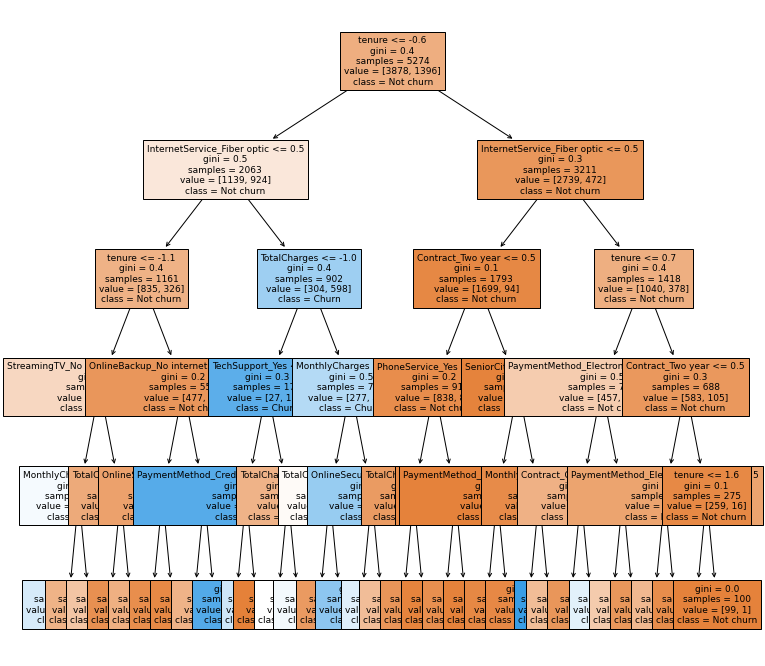

In [112]:
import matplotlib.pyplot as plt
from sklearn import tree

plt.figure(figsize = (12, 12))
tree.plot_tree(decision_tree = mytree_tuned, max_depth = 5, 
               feature_names = X_train.columns, 
              class_names = ['Not churn', 'Churn'], filled = True,
              precision = 1, fontsize = 9)
plt.show()

We can interpret it as a set of if-else rules starting from the top. First row in each leaf is the rule that is then branched by whether or not it is met. True and False labels (left - True, right - False) flowing from parent leaf to the child leaves. 

Customer tenure is the most important variable. If the tenure is lower than -0.6 and customer has InterxnetService_Fiber optic, then it is highly likely that customer will churn. 